Importing the dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Processing


In [ ]:

car_dataset=pd.read_csv('car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking the datas
car_dataset.shape


(301, 9)

In [ ]:
#getting some infos about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking dist of catageroical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#encoding the catagerocial data,converting to numbers
#fuel type_column

car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG' :2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
#splitting the data and target
X=car_dataset.drop(['Car_Name', 'Selling_Price'],axis=1)


#In Y we store target
Y=car_dataset['Selling_Price']

print(X)
print(Y)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting training and test data

In [ ]:
X_train, X_test, Y_train,Y_test =train_test_split(X,Y,test_size=0.1,random_state=2)



In [ ]:
#Model training
#Linear regression
#loading

lin_reg_model =LinearRegression()

lin_reg_model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
#Model evaluation
#prediction on training data

training_data_prediction=lin_reg_model.predict(X_train)
#R SQUARE ERROR

error_score =metrics.r2_score (Y_train, training_data_prediction)

print (f"r squared error is :{error_score} .")

r squared error is :0.8799451660493711 .


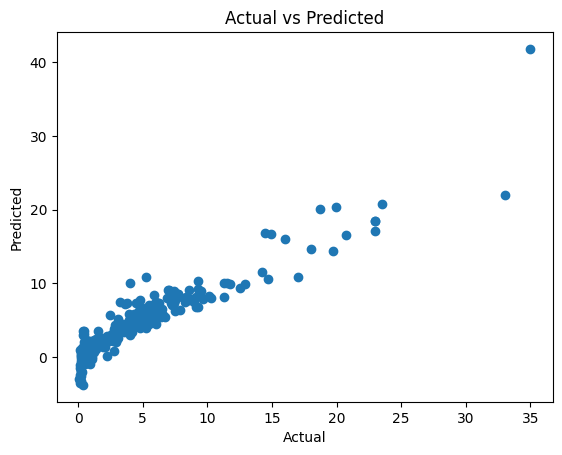

In [ ]:
#visualization

plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual")
plt.ylabel ("Predicted")
plt.title("Actual vs Predicted")

plt.show()

In [ ]:
#prediction on test

test_data_prediction =lin_reg_model.predict(X_test)
#R SQUARE ERROR

error_score_test =metrics.r2_score (Y_test, test_data_prediction)

print (f"r squared error is :{error_score_test} .")


r squared error is :0.8365766715027051 .


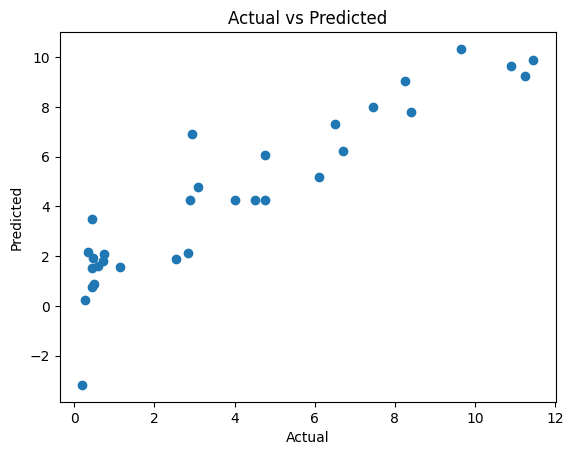

In [ ]:
#visualization

plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual")
plt.ylabel ("Predicted")
plt.title("Actual vs Predicted")

plt.show()